In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras

df = pd.read_excel("/Users/kimjuhwan/Desktop/data/Raisin_Dataset/Raisin_Dataset.xlsx")
df

2023-09-21 18:21:49.744471: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [2]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [5]:
df.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

/var/folders/cf/560dzg5j06ndjd6b99gs0_rw0000gn/T/ipykernel_36700/1065843420.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


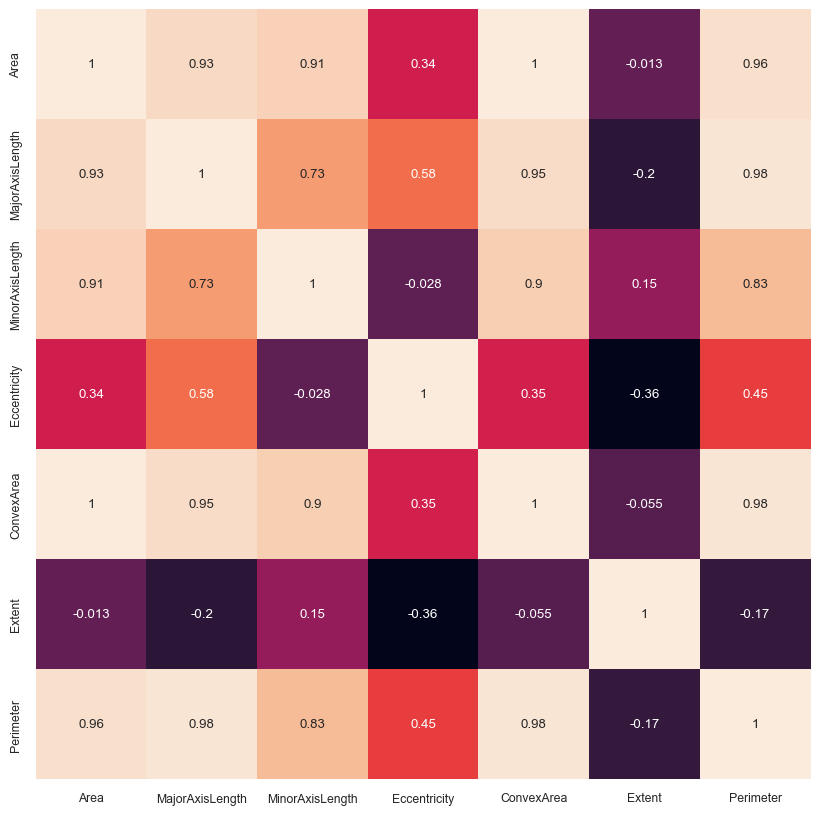

In [6]:
df_corr = df.corr()

plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [20]:
X = df.iloc[:,0:6].values
y = df.iloc[:,7].values

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y1 = encoder.fit_transform(y)

y = pd.get_dummies(y).values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
X

array([[8.75240000e+04, 4.42246011e+02, 2.53291155e+02, 8.19738392e-01,
        9.05460000e+04, 7.58650579e-01],
       [7.51660000e+04, 4.06690687e+02, 2.43032436e+02, 8.01805234e-01,
        7.87890000e+04, 6.84129570e-01],
       [9.08560000e+04, 4.42267048e+02, 2.66328318e+02, 7.98353619e-01,
        9.37170000e+04, 6.37612812e-01],
       ...,
       [9.96570000e+04, 4.31706981e+02, 2.98837323e+02, 7.21684066e-01,
        1.06264000e+05, 7.41098519e-01],
       [9.35230000e+04, 4.76344094e+02, 2.54176054e+02, 8.45738510e-01,
        9.76530000e+04, 6.58798253e-01],
       [8.56090000e+04, 5.12081774e+02, 2.15271976e+02, 9.07345395e-01,
        8.91970000e+04, 6.32019963e-01]])

In [22]:
y

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

model = Sequential()

model.add(Dense(6, input_shape=(6,),activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(Adam(lr=0.02),'binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 6)                 42        
                                                                 
 dense_6 (Dense)             (None, 6)                 42        
                                                                 
 dense_7 (Dense)             (None, 2)                 14        
                                                                 
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________


/Users/kimjuhwan/opt/anaconda3/envs/gcproject/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [24]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32, validation_data = (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

Epoch 1/100
23/23 [==============================] - 0s 5ms/step - loss: 2676.7305 - accuracy: 0.5042 - val_loss: 616.9688 - val_accuracy: 0.4611
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 567.9436 - accuracy: 0.5083 - val_loss: 605.1837 - val_accuracy: 0.5333
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 413.6415 - accuracy: 0.4917 - val_loss: 97.3168 - val_accuracy: 0.5389
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 497.5269 - accuracy: 0.4903 - val_loss: 279.1422 - val_accuracy: 0.5389
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 424.5726 - accuracy: 0.4903 - val_loss: 344.8949 - val_accuracy: 0.5389
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 238.4053 - accuracy: 0.5125 - val_loss: 111.4954 - val_accuracy: 0.5389
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 148.4897 - accuracy: 0.5139 - val_loss: 135.5866 - val_ac

23/23 [==============================] - 0s 2ms/step - loss: 2.4966 - accuracy: 0.7181 - val_loss: 1.2194 - val_accuracy: 0.7889
Epoch 59/100
23/23 [==============================] - 0s 2ms/step - loss: 0.9343 - accuracy: 0.7653 - val_loss: 1.7167 - val_accuracy: 0.7500
Epoch 60/100
23/23 [==============================] - 0s 2ms/step - loss: 3.6687 - accuracy: 0.5958 - val_loss: 5.8277 - val_accuracy: 0.5444
Epoch 61/100
23/23 [==============================] - 0s 2ms/step - loss: 3.3754 - accuracy: 0.6306 - val_loss: 3.6408 - val_accuracy: 0.5611
Epoch 62/100
23/23 [==============================] - 0s 1ms/step - loss: 2.3290 - accuracy: 0.6611 - val_loss: 2.3070 - val_accuracy: 0.5778
Epoch 63/100
23/23 [==============================] - 0s 2ms/step - loss: 1.7926 - accuracy: 0.6750 - val_loss: 2.0149 - val_accuracy: 0.7278
Epoch 64/100
23/23 [==============================] - 0s 2ms/step - loss: 4.4485 - accuracy: 0.6125 - val_loss: 5.0308 - val_accuracy: 0.5111
Epoch 65/100
23/23 

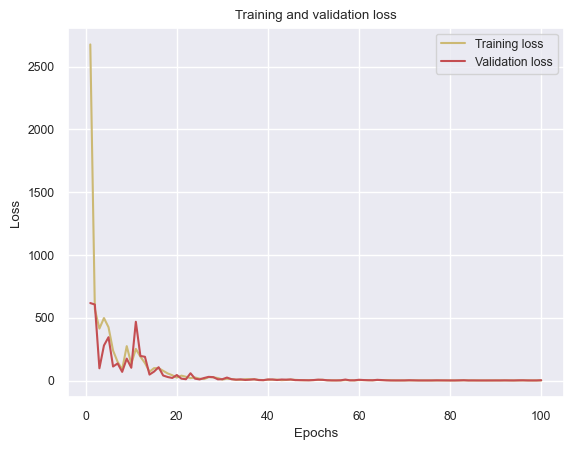

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

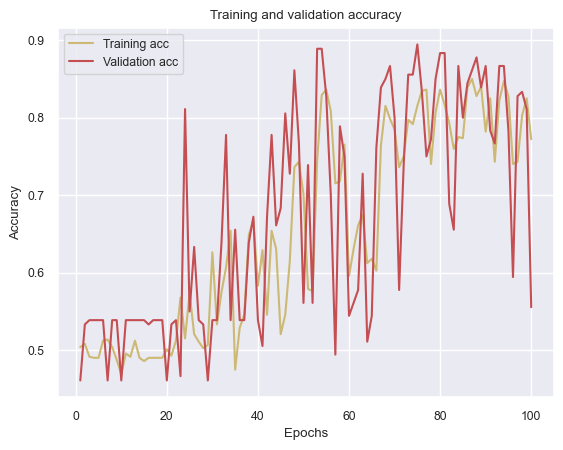

In [26]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71        97
           1       1.00      0.04      0.07        83

    accuracy                           0.56       180
   macro avg       0.77      0.52      0.39       180
weighted avg       0.76      0.56      0.41       180

[[97  0]
 [80  3]]
